## Setting up environment

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6 
import seaborn as sb
sb.set()
## Set up environment


## Download stock price data, store in dataframe

In [2]:
coca_cola = pdr.get_data_yahoo('KO')

# Take a look at the data

In [3]:
coca_cola.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-30,45.119999,44.849998,44.889999,44.849998,9352800.0,38.188110
2017-07-03,45.270000,44.759998,45.110001,44.759998,6434500.0,38.111481
2017-07-05,44.990002,44.730000,44.790001,44.820000,6853600.0,38.162563
2017-07-06,44.849998,44.290001,44.720001,44.400002,13113000.0,37.804951
2017-07-07,44.520000,44.240002,44.470001,44.389999,9566000.0,37.796440


# Store instantaneous rate of return 

In [4]:
coca_cola_return = round(np.log(coca_cola.Close).diff() * 100, 2)
coca_cola_return.dropna(inplace=True)
coca_cola_return.head()

Date
2017-07-03   -0.20
2017-07-05    0.13
2017-07-06   -0.94
2017-07-07   -0.02
2017-07-10   -0.02
Name: Close, dtype: float64

# Plot the series

<AxesSubplot:xlabel='Date'>

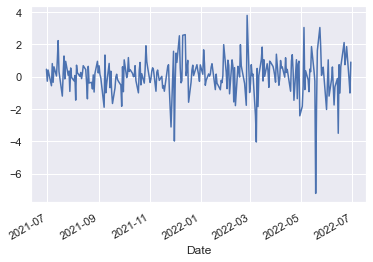

In [5]:
coca_cola_return[-252:].plot()

In [6]:
coca_cola_return.dropna(inplace=True)
coca_cola_return.describe()

count    1257.000000
mean        0.026921
std         1.339624
min       -10.170000
25%        -0.500000
50%         0.070000
75%         0.650000
max         6.280000
Name: Close, dtype: float64

# Descriptive from scipy stats

In [7]:
from scipy import stats

In [8]:
n, minmax, mean, var, skew, kurt = stats.describe(coca_cola_return)
mini, maxi = minmax
std = var ** .5

In [9]:
from scipy.stats import norm

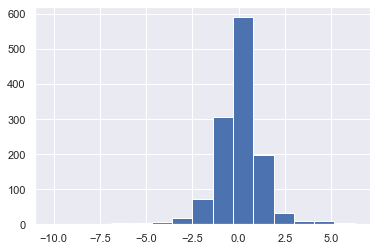

In [10]:
plt.hist(coca_cola_return, bins=15);


In [11]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

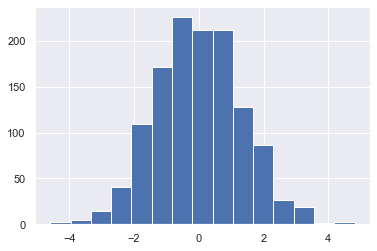

In [12]:
plt.hist(x, bins=15);

# Use scipy stats to test kurtosis, the null hypothesis is a sample from a population where the underlying kustosis is anormally distributed variable.

In [13]:
x_test = stats.kurtosistest(x)
coca_test = stats.kurtosistest(coca_cola_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"KO: {coca_test[0]:13.2f}{coca_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.38          0.7063
KO:         15.21          0.0000


## Plot histogram of price changes with noraml curve overlay

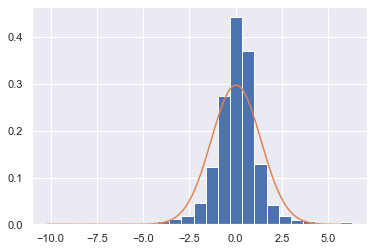

In [14]:
plt.hist(coca_cola_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

# Compare normally distributed sample withe same attributes 

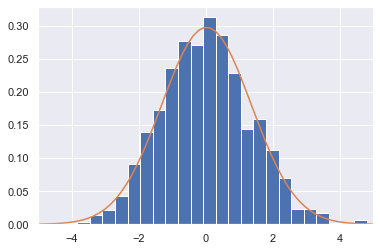

In [15]:
plt.hist(x, bins =25, density=True)
b = np.linspace(mini, maxi, 100)
plt.plot(b, stats.norm.pdf(b, mean, std))
plt.xlim(-5, 5);

In [16]:
stats.ttest_1samp(coca_cola_return.sample(252), 0, alternative = 'two-sided')


Ttest_1sampResult(statistic=-0.18223020050970476, pvalue=0.8555491624241185)

In [17]:
coca_close = pd.DataFrame(coca_cola.Close, columns = ['Close'])
coca_close['lag_1'] = coca_close.Close.shift(1)
coca_close['lag_2'] = coca_close.Close.shift(2)
coca_close.dropna(inplace=True)
coca_close.head()


,Close,lag_1,lag_2
Date,,,
2017-07-05,44.820000,44.759998,44.849998
2017-07-06,44.400002,44.820000,44.759998
2017-07-07,44.389999,44.400002,44.820000
2017-07-10,44.380001,44.389999,44.400002
2017-07-11,44.330002,44.380001,44.389999


<AxesSubplot:xlabel='Date'>

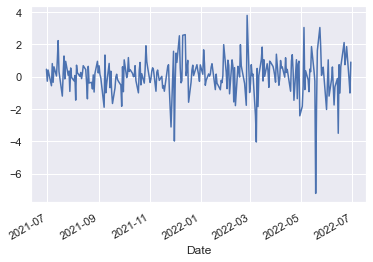

In [18]:
coca_cola_return[-252:].plot()

## Fit linear model

In [19]:
lr = np.linalg.lstsq(coca_close[['lag_1', 'lag_2']], coca_close['Close'], rcond=None)[0]

In [20]:
coca_close['predict'] = np.dot(coca_close[['lag_1', 'lag_2']], lr)
coca_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2017-07-05,44.820000,44.759998,44.849998,44.772093
2017-07-06,44.400002,44.820000,44.759998,44.828308
2017-07-07,44.389999,44.400002,44.820000,44.420375
2017-07-10,44.380001,44.389999,44.400002,44.399986
2017-07-11,44.330002,44.380001,44.389999,44.389986


<AxesSubplot:xlabel='Date'>

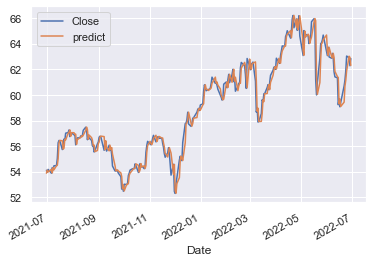

In [21]:
coca_close.iloc[-252:][['Close', 'predict']].plot()